In [48]:
import pandas as pd
import scipy.stats as st
from scipy.stats import t
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

In [49]:
# 데이터 불러오기 
df = pd.read_csv('vgames2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [50]:
# 데이터 전처리
df.sample(5)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
459,460,Renai 0 Kilometer,PSP,2013.0,Adventure,Alchemist,0,0,0.03,0
15492,15493,Yuu Yuu Hakusho 2: Kakutou no Sho,SNES,1994.0,Fighting,Namco Bandai Games,0,0,0.31,0
5681,5682,Blood Omen 2,GC,2002.0,Action,Eidos Interactive,0.04,0.01,0,0
11904,11905,Tony Hawk's Underground,PS2,2003.0,Sports,Activision,2.29,1.17,0.01,0.42
6298,6299,Deadliest Warrior: Ancient Combat,PS3,2012.0,Fighting,Cloud Imperium Games Corporation,0.04,0,0,0


In [51]:
# unnamed 드랍
# year - > int형으로 변환
# *_Sales - > K 나 M, B등의 단위로 혼란. 함수를 통해 수정하도록 설계

In [52]:
df.drop(['Unnamed: 0'],axis=1,inplace = True)

In [53]:
# 결측지 제거
df = df.dropna()

In [54]:
df['Year'] = df.Year.astype('int')

In [55]:
# 함수설계 K가 붙은값은 /1000  B가 붙은값은 그대로 float형으로 배출
def str_to_float(data):
  str_need_change = data
  if 'K' in str_need_change:
    str_need_change.replace('K', '')
    str_need_change = float(str_need_change.replace('K', ''))
    return str_need_change/1000
  elif 'M' in str_need_change:
    str_need_change = str_need_change.replace('M', '')
    return float(str_need_change)
  else:
    return float(str_need_change)

In [56]:
df['NA_Sales'] = df.NA_Sales.apply(str_to_float)
df['EU_Sales'] = df.EU_Sales.apply(str_to_float)
df['JP_Sales'] = df.JP_Sales.apply(str_to_float)
df['Other_Sales'] = df.Other_Sales.apply(str_to_float)

In [57]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16241.000000,16241.000000,16241.000000,16241.000000,16241.000000
mean,1994.178437,0.265195,0.147378,0.078283,0.048234
std,155.484265,0.822431,0.508340,0.309272,0.189678
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,41.490000,29.020000,10.220000,10.570000


In [61]:
df.sample(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10500,Bode Miller Alpine Skiing,PS2,2006,Sports,Valcon Games,0.01,0.01,0.0,0.00
2038,XIII,PS2,2003,Shooter,Ubisoft,0.28,0.22,0.0,0.07
15733,"Monsters, Inc. Scream Team",PS,2001,Platform,Sony Computer Entertainment,0.31,0.21,0.0,0.04
8539,Cars,PS2,2006,Racing,THQ,1.01,0.04,0.0,0.16
14803,Asteroids,PS,1998,Shooter,Success,0.64,0.43,0.0,0.07


In [63]:
df.shape

(16241, 9)

In [66]:
# 전처리 마무리
df.drop_duplicates(inplace=True)
print(df.shape,'\n',df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  int64  
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.2+ MB
(16241, 9) 
 None


In [67]:
# 1
# 지역에 따른 선호하는 게임 장르
# 게임 장르에 따른 판매량을 확인하는 것이 좋아보임.

In [80]:
Sum_Genre = df.groupby('Genre').sum()
Sum_Genre.drop(['Year'],axis=1,inplace=True)
print(Sum_Genre.columns)
print(Sum_Genre)
print(Sum_Genre.index)

Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], dtype='object')
              NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                                  
Action          858.75    513.64    156.60       183.99
Adventure       101.79     63.66     51.87        16.70
Fighting        220.35     99.90     87.14        36.15
Misc            394.73    208.15    104.18        72.64
Platform        445.38    200.63    130.53        51.45
Puzzle          121.58     50.47     56.24        12.44
Racing          354.70    235.02     56.32        76.51
Role-Playing    318.76    183.09    342.93        56.73
Shooter         574.48    310.23     38.18       101.86
Simulation      181.43    112.99     63.54        31.32
Sports          667.26    370.97    134.76       132.35
Strategy         67.83     44.82     49.10        11.23
Index(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
 

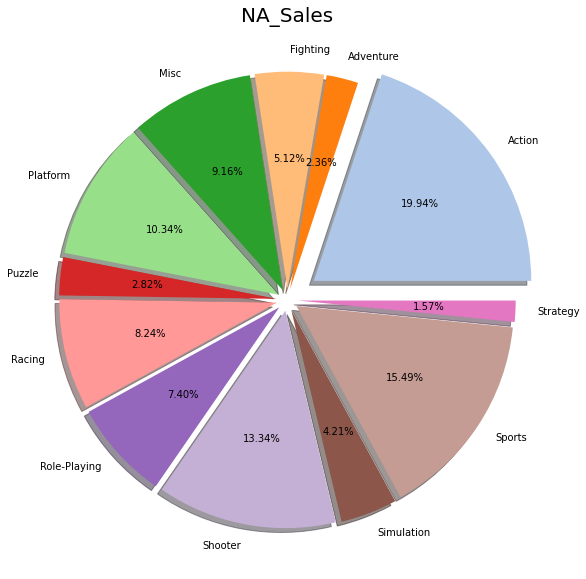

In [96]:
# NA - Action이 제일큼
label = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy']
cmap = plt.get_cmap("tab20")
explode = [0.15, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
plt.figure(figsize=(10, 10))
plt.title('NA_Sales',size=20)
colors = cmap(np.array([1,2,3,4,5,6,7,8,9,10,11,12]))
plt.pie(Sum_Genre['NA_Sales'], labels = label, colors = colors, autopct='%.2f%%',explode=explode, shadow=True)
plt.show()

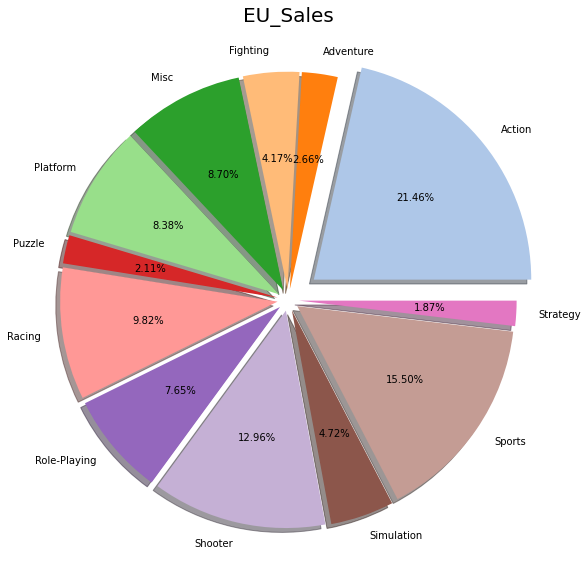

In [97]:
# EU - Action이 제일큼
label = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy']
cmap = plt.get_cmap("tab20")
explode = [0.15, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
plt.figure(figsize=(10, 10))
plt.title('EU_Sales',size=20)
colors = cmap(np.array([1,2,3,4,5,6,7,8,9,10,11,12]))
plt.pie(Sum_Genre['EU_Sales'], labels = label, colors = colors, autopct='%.2f%%',explode=explode, shadow=True)
plt.show()

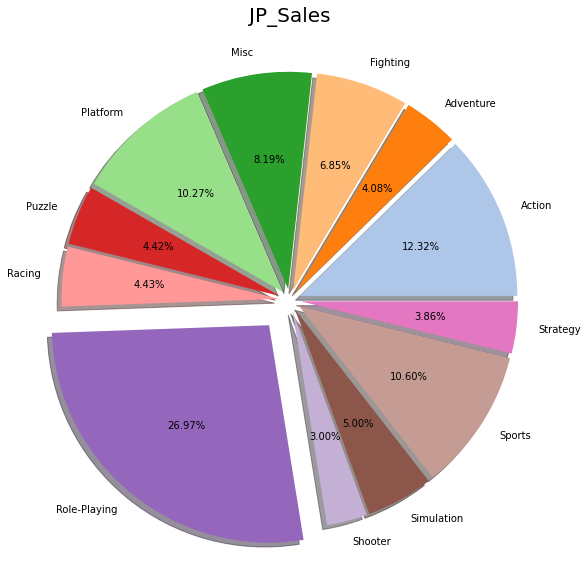

In [100]:
# JP - Role Playing이 제일큼
label = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy']
cmap = plt.get_cmap("tab20")
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.15, 0.05, 0.05, 0.05, 0.05]
plt.figure(figsize=(10, 10))
plt.title('JP_Sales',size=20)
colors = cmap(np.array([1,2,3,4,5,6,7,8,9,10,11,12]))
plt.pie(Sum_Genre['JP_Sales'], labels = label, colors = colors, autopct='%.2f%%',explode=explode, shadow=True)
plt.show()

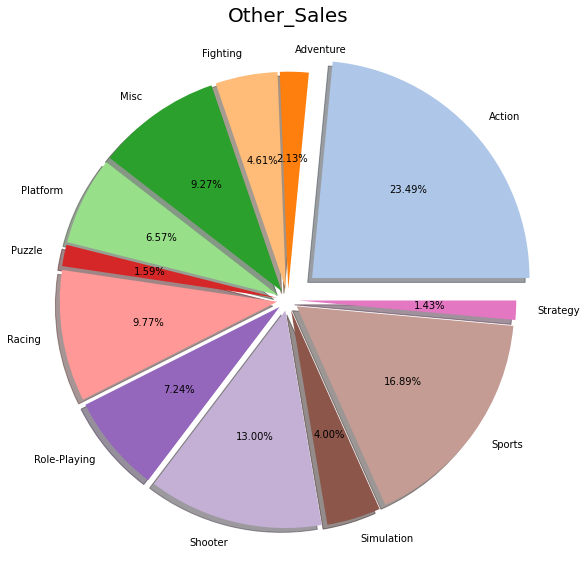

In [101]:
# Other - Action이 제일큼
label = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy']
cmap = plt.get_cmap("tab20")
explode = [0.15, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
plt.figure(figsize=(10, 10))
plt.title('Other_Sales',size=20)
colors = cmap(np.array([1,2,3,4,5,6,7,8,9,10,11,12]))
plt.pie(Sum_Genre['Other_Sales'], labels = label, colors = colors, autopct='%.2f%%',explode=explode, shadow=True)
plt.show()

In [ ]:
# Pie chart를 통해 시각화해본 결과 
# 기타국가와 NA, EU는 Action을 가장 선호
# JP 특이하게 Role-Playing을 가장 선호했다.

# 따라서 JP를 제외하곤 양상이 비슷하게 선호했고 
# 아시아 국가만 특이하게 선호하는 게임의 장르 양상이 다른 것으로 판명